# Comparing important Stocks:
___
* TSLA 
* AAPL 
* AMZN 
* UAL
* GOOG
___

# Headlines:
* Data extraction
* Visulization
* Highest returns
* Risk assesment
* Similarity 
* Most consistent stock 
* Recommendationds  


#### Install these libraries if you dont have them alrady installed: 

In [1]:
# !pip install --upgrade pip

In [2]:
# !pip install matplotlib==3.4.3 --user
# !pip install yfinance --upgrade --no-cache-dir
# !pip install pandas_datareader
# !pip install numpy==1.16.5

In [3]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import matplotlib , numpy, seaborn
print('matplotlib' , ' version' ,'\t', matplotlib.__version__)
print('numpy  ' , ' version' ,'\t', numpy.__version__)
print('Seaborn' , ' version','\t' , seaborn.__version__)

matplotlib  version 	 3.4.3
numpy    version 	 1.16.5
Seaborn  version 	 0.9.0


In [5]:
sns.set(style='ticks', palette='bright')

In [6]:
import yfinance as yf

## Get data using pandas datareader. 

In [7]:
from pandas_datareader import data as pdr
import yfinance as yf

tickers = ['TSLA', 'AAPL', 'AMZN', 'UAL', 'GOOG']
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2021,8,31)
df = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  5 of 5 completed


In [8]:
df.head()

Adj Close                                                Close  \
                 AAPL        AMZN        GOOG   TSLA        UAL       AAPL   
Date                                                                         
2011-01-03  10.106220  184.220001  301.046600  5.324  25.129999  11.770357   
2011-01-04  10.158968  185.009995  299.935760  5.334  25.530001  11.831786   
2011-01-05  10.242065  187.419998  303.397797  5.366  25.350000  11.928571   
2011-01-06  10.233788  185.860001  305.604523  5.576  25.750000  11.918929   
2011-01-07  10.307076  185.490005  307.069031  5.648  25.950001  12.004286   

                                                      ...       Open  \
                  AMZN        GOOG   TSLA        UAL  ...       AAPL   
Date                                                  ...              
2011-01-03  184.220001  301.046600  5.324  25.129999  ...  11.630000   
2011-01-04  185.009995  299.935760  5.334  25.530001  ...  11.872857   
2011-01-05  187.419998  303.397797  5.366  25.350000  ...  11.769643   
2011-01-06  185.860001  305.604523  5.576  25.750000  ...  11.954286   
2011-01-07  185.490005  307.069031  5.648  25.950001  ...  11.928214   

                                                         Volume           \
                  AMZN        GOOG   TSLA        UAL       AAPL     AMZN   
Date                                                                       
2011-01-03  181.369995  297.126312  5.368  24.129999  445138400  5331400   
2011-01-04  186.149994  301.679230  5.332  25.299999  309080800  5031800   
2011-01-05  184.100006  298.914581  5.296  25.530001  255519600  3418800   
2011-01-06  186.500000  304.199799  5.366  25.430000  300428800  3179700   
2011-01-07  187.880005  306.805023  5.600  25.750000  311931200  5221700   

                                        
               GOOG      TSLA      UAL  
Date                                    
2011-01-03  4748131   6415000  7636700  
2011-01-04  3662677   5937000  7163100  
2011-01-05  5083583   7233500  7953300  
2011-01-06  4131026  10306000  5933200  
2011-01-07  4218152  11239500  4370400  

[5 rows x 30 columns]

In [9]:
# df.columns[5:10]

In [10]:
df=df['Close']

In [11]:
df.head()

,AAPL,AMZN,GOOG,TSLA,UAL
Date,,,,,
2011-01-03,11.770357,184.220001,301.046600,5.324,25.129999
2011-01-04,11.831786,185.009995,299.935760,5.334,25.530001
2011-01-05,11.928571,187.419998,303.397797,5.366,25.350000
2011-01-06,11.918929,185.860001,305.604523,5.576,25.750000
2011-01-07,12.004286,185.490005,307.069031,5.648,25.950001


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2683 entries, 2011-01-03 to 2021-08-30
Data columns (total 5 columns):
AAPL    2683 non-null float64
AMZN    2683 non-null float64
GOOG    2683 non-null float64
TSLA    2683 non-null float64
UAL     2683 non-null float64
dtypes: float64(5)
memory usage: 125.8 KB


Text(0, 0.5, 'Stock Price (USD)')

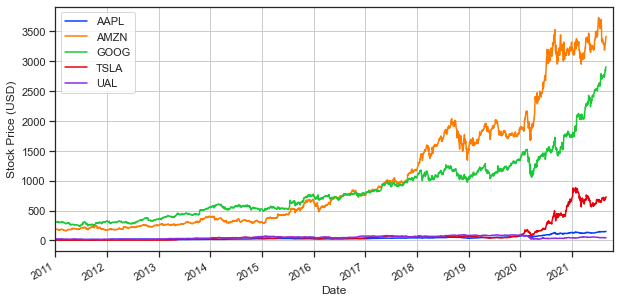

In [13]:
df.plot(kind='line', figsize=(10,5))
plt.xlim([datetime.date(2011, 1, 1), datetime.date(2021, 10, 20)])
plt.grid('on')
plt.ylabel('Stock Price (USD)')

### Create DataFrame for maximum possible returns from 2011 to 2021
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
df_MinMax=pd.DataFrame(df.idxmin(), columns=['Min Date'])
df_MinMax['Min price']=df.min()

In [15]:
df_MinMax['Max Date']=df.idxmax()

In [16]:
df_MinMax['Max price']=df.max()

In [17]:
df_MinMax['Return']=(df_MinMax['Max price']-df_MinMax['Min price'])/df_MinMax['Min price']

In [18]:
df_MinMax.round(1)

,Min Date,Min price,Max Date,Max price,Return
AAPL,2011-06-20,11.3,2021-08-30,153.1,12.6
AMZN,2011-03-17,161.0,2021-07-08,3731.4,22.2
GOOG,2011-06-24,236.6,2021-08-30,2909.4,11.3
TSLA,2011-02-23,4.4,2021-01-26,883.1,201.3
UAL,2011-11-23,15.5,2018-11-30,96.7,5.2


<AxesSubplot:>

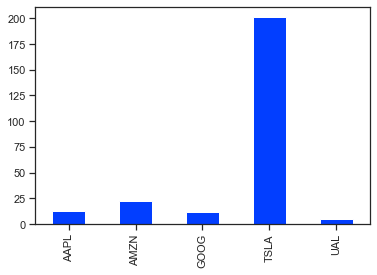

In [19]:
df_MinMax['Return'].plot(kind='bar')

### Returns for each stock per day. 


In [20]:
returns=pd.DataFrame()

In [21]:
for tick in tickers:
    returns[tick+ ' Return'] = df[tick].pct_change()

In [22]:
returns.head()

,TSLA Return,AAPL Return,AMZN Return,UAL Return,GOOG Return
Date,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.001878,0.005219,0.004288,0.015917,-0.003690
2011-01-05,0.005999,0.008180,0.013026,-0.007051,0.011543
2011-01-06,0.039135,-0.000808,-0.008324,0.015779,0.007273
2011-01-07,0.012912,0.007161,-0.001991,0.007767,0.004792


### Create DataFrame for maximum possible returns <u>PER DAY </u> from 2011 to 2021

In [23]:
R_Min_Max= pd.DataFrame()

In [24]:
R_Min_Max['Min Return(%)']=100* returns.min()
R_Min_Max['Min_date']=returns.idxmin()

In [25]:
R_Min_Max['Max Return (%)']=100* returns.max()
R_Min_Max['Max_Date']= returns.idxmax()


In [26]:
R_Min_Max['STD of returns (%)']=100*returns.std()

In [27]:
R_Min_Max.round(1)

,Min Return(%),Min_date,Max Return (%),Max_Date,STD of returns (%)
TSLA Return,-21.1,2020-09-08,24.4,2013-05-09,3.5
AAPL Return,-12.9,2020-03-16,12.0,2020-03-13,1.8
AMZN Return,-12.7,2011-10-26,15.7,2012-04-27,2.0
UAL Return,-30.3,2020-03-18,25.7,2020-03-24,3.0
GOOG Return,-11.1,2020-03-16,16.1,2015-07-17,1.6


Text(0, 0.5, 'Std (Return)')

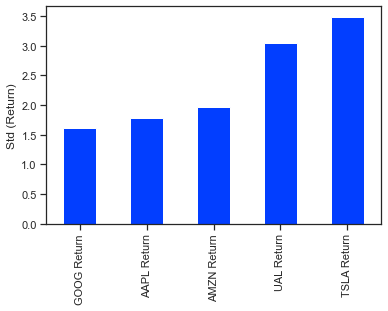

In [28]:
R_Min_Max['STD of returns (%)'].sort_values().plot(kind='bar')
plt.ylabel('Std (Return)')

### Daly Returns distribution  

std on: 2020 : 0.029


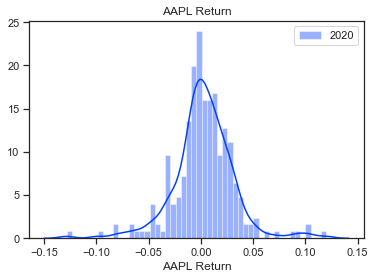

In [29]:
y=2020
sns.distplot(returns[returns.index.year==y]['AAPL Return'][1:], bins=50, label=str(y))
plt.legend()
plt.title('AAPL Return')
print('std on:', str(y),':', np.round(returns[returns.index.year==y]['AAPL Return'][1:].std(),3))

std on:  2020 : 0.024


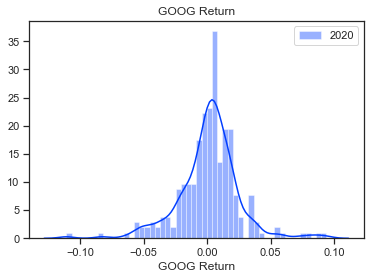

In [30]:
y=2020
sns.distplot(returns[returns.index.year==y]['GOOG Return'][1:], bins=50, label=str(y))
plt.legend()
plt.title('GOOG Return')
print('std on: ', str(y),':', np.round(returns[returns.index.year==y]['GOOG Return'][1:].std(),3))

std on:  2020 : 0.065


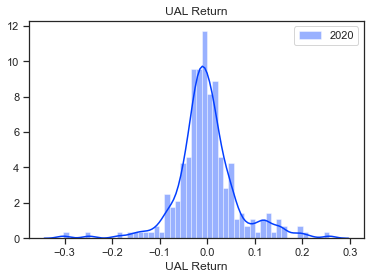

In [31]:
y=2020
sns.distplot(returns[returns.index.year==y]['UAL Return'][1:], bins=50, label=str(y))
plt.legend()
plt.title('UAL Return')
print('std on: ', str(y),':', np.round(returns[returns.index.year==y]['UAL Return'][1:].std(),3))

std on:  2020 : 0.024


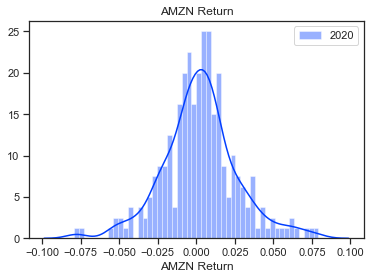

In [32]:
y=2020
sns.distplot(returns[returns.index.year==y]['AMZN Return'][1:], bins=50, label=str(y))
plt.legend()
plt.title('AMZN Return')
print('std on: ', str(y),':', np.round(returns[returns.index.year==y]['AMZN Return'][1:].std(),3))

### Correlations between the returns of the stock

<AxesSubplot:>

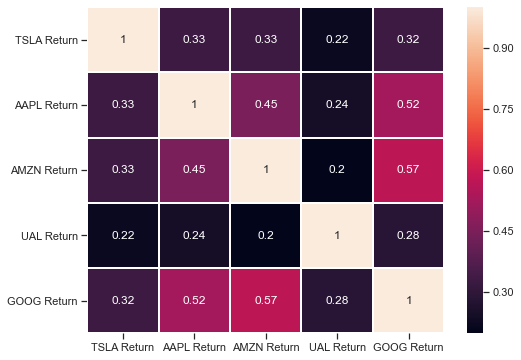

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(returns[1:].corr(), annot=True,linewidths=0.2)

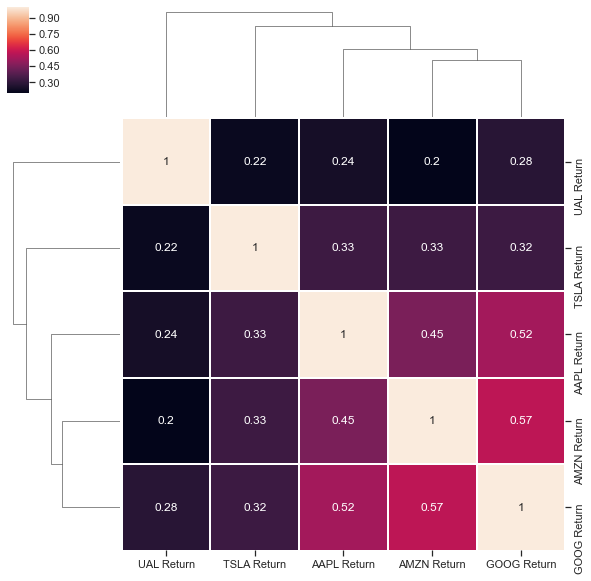

In [34]:
sns.clustermap(returns[1:].corr(), annot=True, linewidths=0.2)

____
## Moving Averages

(17532.0, 18864.0)

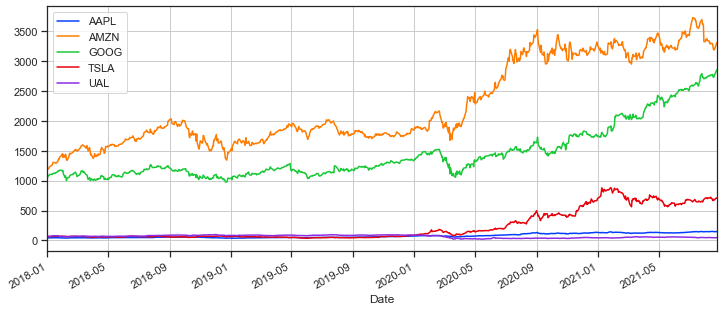

In [35]:
df.plot(kind='line', figsize=(12,5))
plt.grid('on')
plt.xlim([datetime.date(2018, 1, 1), datetime.date(2021, 8, 25)])

(17532.0, 18900.0)

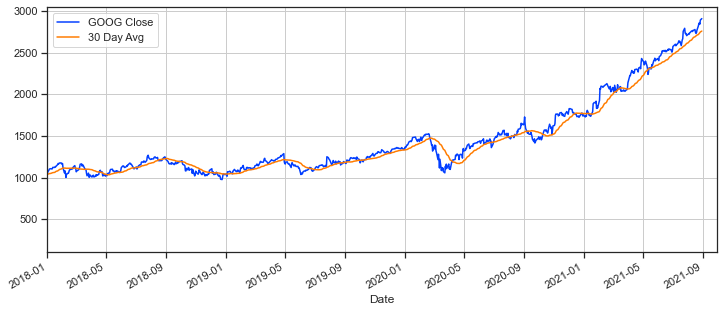

In [36]:
df['GOOG'].plot(kind='line', figsize=(12,5), label='GOOG Close')
df['GOOG'].rolling(window=30).mean().plot(kind='line', figsize=(12,5), label='30 Day Avg')
plt.legend()
plt.grid('on')
plt.xlim([datetime.date(2018,1,1), datetime.date(2021,9,30)])

(17532.0, 18900.0)

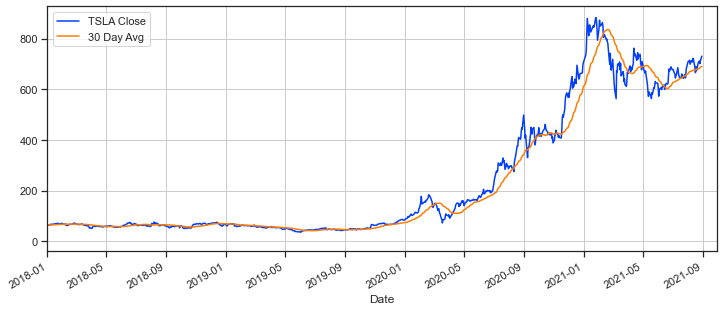

In [37]:
df['TSLA'].plot(kind='line', figsize=(12,5), label='TSLA Close')
df['TSLA'].rolling(window=30).mean().plot(kind='line', figsize=(12,5), label='30 Day Avg')
plt.legend()
plt.grid('on')
plt.xlim([datetime.date(2018,1,1), datetime.date(2021,9,30)])

### Correlations of stock prices

<AxesSubplot:>

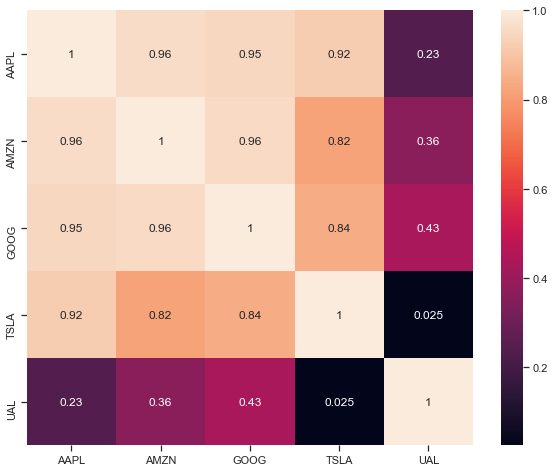

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<Figure size 720x576 with 0 Axes>

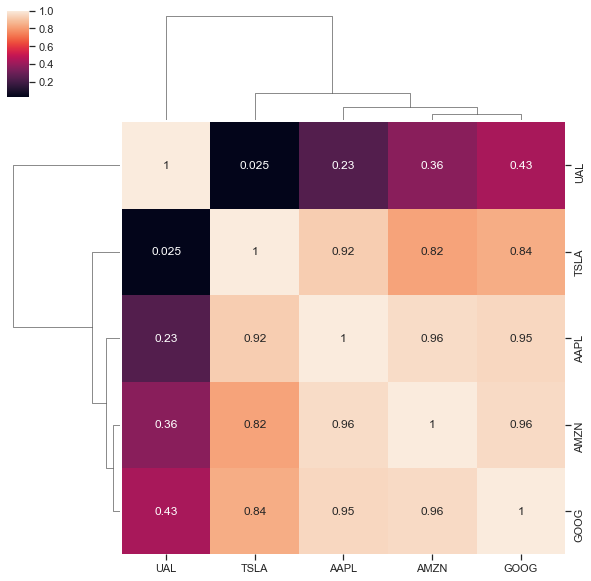

In [39]:
plt.figure(figsize=(10,8))
sns.clustermap(df.corr(), annot=True)

# Conclusions: 




 #### Highest return possible in 10 years  =
      * TSLA , 201.3 times
       
 #### Most reskiest stocks :  
      1. TSLA , std= 0.035 = 3.5 % , 
      2. UAL  , std= 0.030 = 3  %
       
 #### Highest single day lost = 
      * UAL,  -0.302902 , 30.29 %
        
 #### Hiest single day gain = 
      * UAL , 0.257143 = 25.7 %
         
 #### Most reliable and consistent ones:
     1. GOOG, std= 0.0162 , 1.6% 
     2. AAPL, std= 0.0178 , 1.78%
   
  
 #### Most Similar stocks in terms of returns and price :
          GOOG, AMZN, APPL